# Background:
At PatientPop, we provide tools to help healthcare providers (e.g., doctors, dentists,  chiropractors, therapists) manage their online reputations. One key data team initiative involves assessing the performance of these tools in order to help optimize our products and quantify the value they bring to providers. 

For example, one of our tools is an automated feedback survey sent to patients after their appointments. Practices use a “short” version of the survey during their first 6 months with PatientPop and then must switch to one of two “long” versions after that. The goals of these surveys are to generate 1) more online reviews for a practice and 2) more positive reviews (higher ratings). The Data team was asked to analyze the effectiveness of each of the “long” versions and recommend which “long” version would be best suited to each practice. 

In this challenge, we would like you to answer several questions related to this request using sample data similar to what actually would be used in this initiative. The challenge is intended to assess your ability to analyze data using analytics, statistics and/or machine learning methods and to tell informative data stories (including visualizations!) with the insights generated by your analysis. 

Please answer as much as you can, spending no more than 4 hours on this project. It is fine if you do not have time to answer all of the questions. We will evaluate whatever you complete.

Please submit separately:
1) Your code
2) Your answers (format is your choice, e.g., a report or a presentation)

Data:
[see attached file]
review_id: unique identifier for each patient-submitted review of a provider at a given practice

review_date: date the review was submitted

rating: number of stars given to the provider in the review; stars range from 1-5, with 5 being high, no stars given = 0

practice_id: unique identifier for each healthcare practice

n_providers: number of providers working at a practice

n_providers_surveys: At some practices, not all providers choose to send surveys to their patients. Thus, this field is less than or equal to n_providers.

version: which version of the “long” survey a practice chooses (v1 or v2)	

short_start_date: date a practice joins PatientPop and begins sending the “short” survey to its patients

long_start_date: date on which a practice begins sending the “long” survey to its patients. This will be 6 mos after joining PatientPop.

tech_type: Code for the electronic health records system used by each practice. The type of system used allows different levels of integration with PatientPop’s tools.

specialty: primary specialty of a practice (e.g., internal medicine, dermatology, pediatrics, general dentist)

zip: practice headquarters location

city: practice headquarters location

state: practice headquarters location

Questions:

1) Do the “long” surveys result in significantly more reviews than the “short” surveys? Which “long” survey has a greater impact (v1 or v2)?

2) What kinds of practices do best with “long” survey v1? Would you recommend “long” survey v2 to any specific kinds of practices?

3) Do ratings change significantly with either “long” survey? How would you predict which practices will have success, defined as at least a 0.3 star increase in their “long” survey average monthly rating vs their “short” survey average monthly rating? 

4) Would you recommend replacing the “short” survey with either (or both) of the “long” surveys for any or all practices? Provide reasons to support your answer. If you do not have enough data to make a recommendation, what additional data would you need?


In [377]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



In [378]:

DF = pd.read_csv("PP_reviews.csv")

In [379]:
DF.head()

,review_id,review_date,rating,practice_id,n_providers,n_providers_surveys,short_start_date,long_start_date,version,city,state,zip,tech_type,specialty
0,274252,2017-05-23,5.0,2,1,1,2017-04-13,2017-10-10,v1,Santa Monica,CA,90404,ATHEN,Obstetrician and Gynecologist
1,267767,2017-12-30,5.0,2,1,1,2017-04-13,2017-10-10,v1,Santa Monica,CA,90404,ATHEN,Obstetrician and Gynecologist
2,626201,2018-04-03,1.0,2,1,1,2017-04-13,2017-10-10,v1,Santa Monica,CA,90404,ATHEN,Obstetrician and Gynecologist
3,161319,2017-09-08,5.0,3,1,1,2017-09-03,2018-03-02,v2,Santa Monica,CA,90404,ADVAN,Obstetrician and Gynecologist
4,275147,2017-09-11,5.0,3,1,1,2017-09-03,2018-03-02,v2,Santa Monica,CA,90404,ADVAN,Obstetrician and Gynecologist


In [380]:
DF.describe()

,review_id,rating,practice_id,n_providers,n_providers_surveys,zip
count,4.104130e+05,410413.000000,410413.000000,410413.000000,410413.000000,410413.000000
mean,1.143601e+06,3.567973,12097.962935,5.336044,4.238460,53547.366511
std,5.004602e+05,2.172081,1955.647520,6.909282,6.295056,31017.726713
min,9.847100e+04,0.000000,2.000000,1.000000,0.000000,1028.000000
25%,7.317630e+05,1.000000,10796.000000,1.000000,1.000000,23462.000000
50%,1.218286e+06,5.000000,12100.000000,2.000000,1.000000,60181.000000
75%,1.620049e+06,5.000000,13418.000000,6.000000,5.000000,78758.000000
max,1.847052e+06,5.000000,15923.000000,35.000000,33.000000,99701.000000


In [381]:
DF['short_start_date']= pd.to_datetime(DF['short_start_date'])
DF['long_start_date']= pd.to_datetime(DF['long_start_date'])


In [382]:
DF['long_start_date'].describe()

count                  410413
unique                    322
top       2017-10-10 00:00:00
freq                   172070
first     2017-10-10 00:00:00
last      2019-01-11 00:00:00
Name: long_start_date, dtype: object

In [383]:
DF['short_start_date'].describe()

count                  410413
unique                    322
top       2017-04-13 00:00:00
freq                   172070
first     2017-04-13 00:00:00
last      2018-07-15 00:00:00
Name: short_start_date, dtype: object

In [384]:
DF['review_date'].value_counts().head()

#a date in 3017 seems like an error

2018-11-14    14319
2018-10-14    11525
2017-12-14    11069
2018-09-14    10562
2018-08-14     8607
Name: review_date, dtype: int64

In [385]:
DF['review_date']= DF['review_date'].replace("3017-05-03", "2017-05-03")
DF['review_date'].value_counts().head()

2018-11-14    14319
2018-10-14    11525
2017-12-14    11069
2018-09-14    10562
2018-08-14     8607
Name: review_date, dtype: int64

In [386]:
DF['review_date']= pd.to_datetime(DF['review_date'])

In [387]:
DF['long_start_date'][1]

Timestamp('2017-10-10 00:00:00')

In [388]:
#If their review date is before the long survey start date
#they took the short survey

#Divide into short | long 
#Then long v1 | long v2 

DF['delta']= DF['review_date']-DF['long_start_date']



In [389]:
a = pd.Timedelta('0 days')
DF['long_or_short'] = np.where(DF['delta']>=a, 'long', 'short')

In [390]:
DF['long_or_short'].value_counts()

long     329755
short     80658
Name: long_or_short, dtype: int64

In [391]:
DF['review_month']= DF['review_date'].dt.month

In [392]:
DF['review_year']= DF['review_date'].dt.year

In [393]:
DF.groupby(['review_year','review_month','version']).count()

review_id  review_date  rating  practice_id  \
review_year review_month version                                                
2017        4            v1            1388         1388    1388         1388   
                         v2            2209         2209    2209         2209   
            5            v1            2851         2851    2851         2851   
                         v2            1893         1893    1893         1893   
            6            v1            4179         4179    4179         4179   
                         v2            1943         1943    1943         1943   
            7            v1            3207         3207    3207         3207   
                         v2            1780         1780    1780         1780   
            8            v1            3534         3534    3534         3534   
                         v2            2362         2362    2362         2362   
            9            v1            3715         3715    3715         3715   
                         v2            2355         2355    2355         2355   
            10           v1            4846         4846    4846         4846   
                         v2            3242         3242    3242         3242   
            11           v1            4403         4403    4403         4403   
                         v2            3875         3875    3875         3875   
            12           v1           15459        15459   15459        15459   
                         v2            6086         6086    6086         6086   
2018        1            v1            8028         8028    8028         8028   
                         v2            8209         8209    8209         8209   
            2            v1            7597         7597    7597         7597   
                         v2            5810         5810    5810         5810   
            3            v1           10583        10583   10583        10583   
                         v2            9191         9191    9191         9191   
            4            v1           10379        10379   10379        10379   
                         v2           10555        10555   10555        10555   
            5            v1           11114        11114   11114        11114   
                         v2           11351        11351   11351        11351   
            6            v1           12666        12666   12666        12666   
                         v2           12680        12680   12680        12680   
            7            v1           12278        12278   12278        12278   
                         v2           14208        14208   14208        14208   
            8            v1           13534        13534   13534        13534   
                         v2           18450        18450   18450        18450   
            9            v1           12797        12797   12797        12797   
                         v2           19643        19643   19643        19643   
            10           v1           14280        14280   14280        14280   
                         v2           23810        23810   23810        23810   
            11           v1           16008        16008   16008        16008   
                         v2           29631        29631   29631        29631   
            12           v1           10670        10670   10670        10670   
                         v2           26255        26255   26255        26255   
2019        1            v1            4361         4361    4361         4361   
                         v2            6998         6998    6998         6998   

                                  n_providers  n_providers_surveys  \
review_year review_month version                                     
2017        4            v1              1388                 1388   
                         v2              2209                 2209   
            5            v1

In [394]:
PVLS = pd.pivot_table(DF, index=['review_year', 'review_month', 'practice_id'], 
                      columns=['long_or_short'], aggfunc=len)
PVLS.head() #average ratings long v short per provider per month

city       delta       long_start_date  \
long_or_short                        long short  long short            long   
review_year review_month practice_id                                          
2017        4            6            NaN   3.0   NaN   3.0             NaN   
                         7            NaN  18.0   NaN  18.0             NaN   
                         13           NaN  14.0   NaN  14.0             NaN   
                         16           NaN   2.0   NaN   2.0             NaN   
                         30           NaN   2.0   NaN   2.0             NaN   

                                           n_providers        \
long_or_short                        short        long short   
review_year review_month practice_id                           
2017        4            6             3.0         NaN   3.0   
                         7            18.0         NaN  18.0   
                         13           14.0         NaN  14.0   
                         16            2.0         NaN   2.0   
                         30            2.0         NaN   2.0   

                                     n_providers_surveys        ...   \
long_or_short                                       long short  ...    
review_year review_month practice_id                            ...    
2017        4            6                           NaN   3.0  ...    
                         7                           NaN  18.0  ...    
                         13                          NaN  14.0  ...    
                         16                          NaN   2.0  ...    
                         30                          NaN   2.0  ...    

                                     specialty       state       tech_type  \
long_or_short                             long short  long short      long   
review_year review_month practice_id                                         
2017        4            6                 NaN   3.0   NaN   3.0       NaN   
                         7                 NaN  18.0   NaN  18.0       NaN   
                         13                NaN  14.0   NaN  14.0       NaN   
                         16                NaN   2.0   NaN   2.0       NaN   
                         30                NaN   2.0   NaN   2.0       NaN   

                                           version        zip        
long_or_short                        short    long short long short  
review_year review_month practice_id                                 
2017        4            6             3.0     NaN   3.0  NaN   3.0  
                         7            18.0     NaN  18.0  NaN  18.0  
                         13           14.0     NaN  14.0  NaN  14.0  
                         16            2.0     NaN   2.0  NaN   2.0  
                         30            2.0     NaN   2.0  NaN   2.0  

[5 rows x 28 columns]

In [395]:
PVLS2 = pd.pivot_table(DF, index=['review_date'], 
                      columns=['long_or_short'], aggfunc=len)
PVLS2.head() #average ratings long v short per provider per month

city        delta        long_start_date        n_providers  \
long_or_short long  short  long  short            long  short        long   
review_date                                                                 
2017-04-13     NaN  237.0   NaN  237.0             NaN  237.0         NaN   
2017-04-14     NaN  215.0   NaN  215.0             NaN  215.0         NaN   
2017-04-15     NaN  105.0   NaN  105.0             NaN  105.0         NaN   
2017-04-16     NaN   48.0   NaN   48.0             NaN   48.0         NaN   
2017-04-17     NaN  170.0   NaN  170.0             NaN  170.0         NaN   

                     n_providers_surveys         ...   specialty        state  \
long_or_short  short                long  short  ...        long  short  long   
review_date                                      ...                            
2017-04-13     237.0                 NaN  237.0  ...         NaN  237.0   NaN   
2017-04-14     215.0                 NaN  215.0  ...         NaN  215.0   NaN   
2017-04-15     105.0                 NaN  105.0  ...         NaN  105.0   NaN   
2017-04-16      48.0                 NaN   48.0  ...         NaN   48.0   NaN   
2017-04-17     170.0                 NaN  170.0  ...         NaN  170.0   NaN   

                     tech_type        version         zip         
long_or_short  short      long  short    long  short long  short  
review_date                                                       
2017-04-13     237.0       NaN  237.0     NaN  237.0  NaN  237.0  
2017-04-14     215.0       NaN  215.0     NaN  215.0  NaN  215.0  
2017-04-15     105.0       NaN  105.0     NaN  105.0  NaN  105.0  
2017-04-16      48.0       NaN   48.0     NaN   48.0  NaN   48.0  
2017-04-17     170.0       NaN  170.0     NaN  170.0  NaN  170.0  

[5 rows x 32 columns]

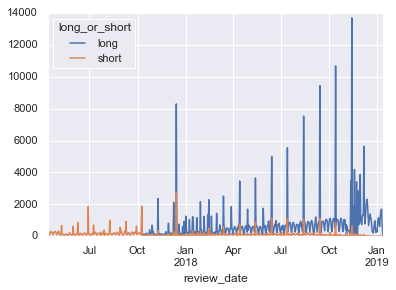

In [396]:
svm2 =PVLS2['city'].plot()
#Count of total reviews long v short by date
figure = svm.get_figure()    
figure.savefig('longshorttimeseriesPP2.png', dpi=400)

In [397]:
PVLS3 = pd.pivot_table(DF,values='city', index=['review_date', 'practice_id'], 
                      columns=['long_or_short'], aggfunc=len)
PVLS3.head() #average ratings long v short per provider per month


long_or_short            long  short
review_date practice_id             
2017-04-13  7             NaN    1.0
            47            NaN    1.0
            9026          NaN    1.0
            9070          NaN    1.0
            9123          NaN    4.0

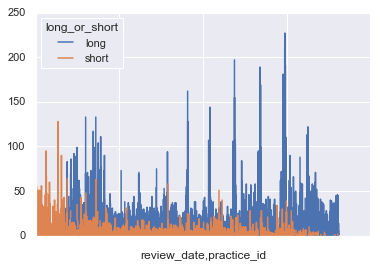

In [398]:
svm3 =PVLS3.plot()
#Count of reviews per provider by date, long v short  
figure = svm.get_figure()    
figure.savefig('longshorttimeseriesPP3.png', dpi=400)

In [399]:
cat1 = DF[(DF['long_or_short']=='long')]
cat2 = DF[(DF['long_or_short']=='short')]

In [400]:
cat1['review_date'].describe()

count                  329755
unique                    460
top       2018-11-14 00:00:00
freq                    13692
first     2017-10-10 00:00:00
last      2019-01-12 00:00:00
Name: review_date, dtype: object

In [401]:
cat2['review_date'].describe()

count                   80658
unique                    636
top       2017-12-14 00:00:00
freq                     2772
first     2017-04-13 00:00:00
last      2019-01-10 00:00:00
Name: review_date, dtype: object

In [402]:
len(cat1)/len(cat2)

4.088311140866374

In [403]:
cat2.describe()

,review_id,rating,practice_id,n_providers,n_providers_surveys,zip,delta,review_month,review_year
count,8.065800e+04,80658.000000,80658.000000,80658.000000,80658.000000,80658.000000,80658,80658.000000,80658.000000
mean,8.055583e+05,3.932276,12304.000570,4.505244,3.277939,54010.982023,-82 days +11:54:12.934612,6.990305,2017.480820
std,5.377248e+05,1.913465,2130.995826,6.208356,5.241078,32001.123517,54 days 18:46:53.683714,2.818913,0.500651
min,9.847100e+04,0.000000,2.000000,1.000000,0.000000,1104.000000,-240 days +00:00:00,1.000000,2017.000000
25%,3.234122e+05,4.000000,10768.000000,1.000000,1.000000,22209.000000,-128 days +00:00:00,5.000000,2017.000000
50%,7.252650e+05,5.000000,12255.000000,2.000000,1.000000,60532.000000,-78 days +00:00:00,7.000000,2017.000000
75%,1.230210e+06,5.000000,14014.000000,5.000000,3.000000,85024.000000,-31 days +00:00:00,9.000000,2018.000000
max,1.842145e+06,5.000000,15923.000000,35.000000,33.000000,99701.000000,-1 days +00:00:00,12.000000,2019.000000


In [404]:
len(cat1['practice_id'].unique())

3666

In [405]:
len(cat2['practice_id'].unique())

3507

In [406]:
shared_practice_ids = pd.Series(list(set(cat1['practice_id'].unique()).intersection(set(cat2['practice_id'].unique()))))
len(pd.Series(list(set(cat1['practice_id'].unique()).intersection(set(cat2['practice_id'].unique())))))
#Okay, a fair number of them are shared 

3364

In [407]:
after = cat1[cat1['practice_id'].isin(shared_practice_ids)]
before = cat2[cat2['practice_id'].isin(shared_practice_ids)]

In [408]:
len(after)/len(before) *100

407.6178929554697

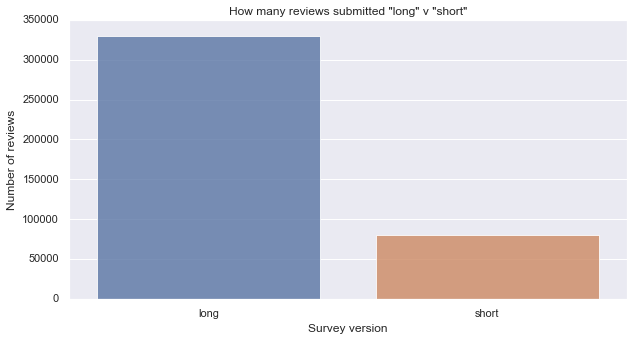

<Figure size 432x288 with 0 Axes>

In [409]:
plt.figure(figsize=(10,5))
sns.barplot(DF['long_or_short'].value_counts().index, DF['long_or_short'].value_counts().values, alpha=0.8)
plt.title('How many reviews submitted "long" v "short"')
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Survey version', fontsize=12)
plt.show()

plt.savefig('LongVShortPP.png')

In [410]:
beforeavg = pd.pivot_table(before, index= ['practice_id'], values= "rating")

afteravg = pd.pivot_table(after, index= ['practice_id'], values= "rating")
print(len(beforeavg), len(afteravg))
print(beforeavg.head())

3364 3364
               rating
practice_id          
2            5.000000
3            4.311828
5            5.000000
6            3.650000
7            4.861789


In [411]:
stats.ttest_rel(beforeavg, afteravg) 
#Okay, great. Tiny p value means that the before and after ratings are significant


#With further time and resources, I would do by practice by month and correct for differences in sampling rate by 
#adding dummy lines for empty dates/practice_ids

Ttest_relResult(statistic=array([22.71338276]), pvalue=array([2.25915562e-106]))

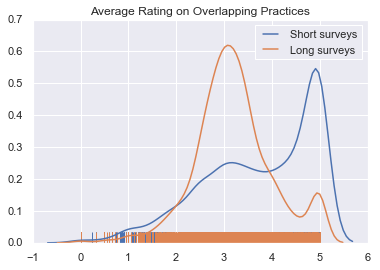

In [412]:
sns.distplot(beforeavg, hist=False, label = "Short surveys", rug=True).set_title("Average Rating on Overlapping Practices")
sns.distplot(afteravg, hist=False, label = "Long surveys",rug=True)
plt.savefig('AverageRatingLSPP.png')

In [289]:
beforecount = pd.pivot_table(before, index= ['practice_id'], values= "rating", aggfunc=len)

aftercount = pd.pivot_table(after, index= ['practice_id'], values= "rating", aggfunc=len)
print(len(beforecount), len(aftercount))
print(beforecount.head())

3364 3364
             rating
practice_id        
2               1.0
3              93.0
5               2.0
6              20.0
7             123.0


In [290]:
stats.ttest_rel(beforecount, aftercount) 
#And, to a lesser but still strong degree, there is a significant difference between the number of reviews from the 
#same pool of providers from short v long


#1) Do the “long” surveys result in significantly more reviews than the “short” surveys? Yes

Ttest_relResult(statistic=array([-17.31264325]), pvalue=array([2.15973714e-64]))

In [339]:
beforecount.columns = ['Short Count']
aftercount.columns=['Long Count']

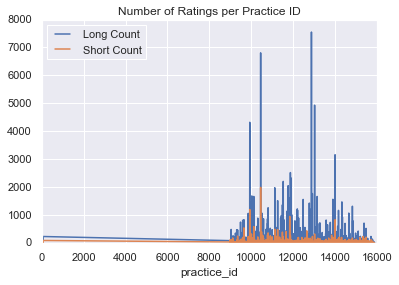

In [352]:

combo =pd.concat([ aftercount,beforecount], axis=1)
combo.plot(title='Number of Ratings per Practice ID')
plt.savefig('Number of Ratings per Practice ID LSPP.png')

In [353]:
cat1['version'].value_counts()

v2    184994
v1    144761
Name: version, dtype: int64

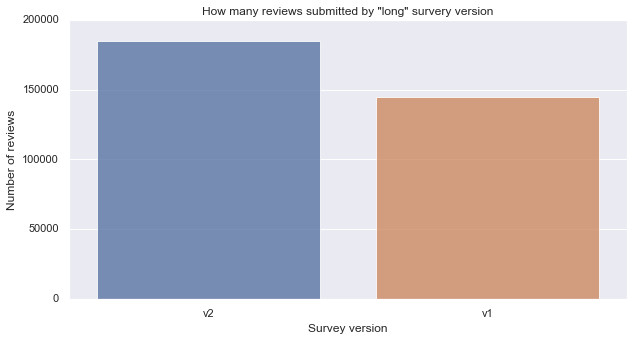

<Figure size 432x288 with 0 Axes>

In [355]:
plt.figure(figsize=(10,5))
sns.barplot(cat1['version'].value_counts().index, cat1['version'].value_counts().values, alpha=0.8)
plt.title('How many reviews submitted by "long" survery version')
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Survey version', fontsize=12)
plt.show()
plt.savefig('LongVLongPP.png')

In [375]:
v1DF= cat1[cat1['version'] == 'v1']
v2DF= cat1[cat1['version'] == 'v2']


In [427]:
v1count = pd.pivot_table(v1DF, index= ['practice_id'], values= "rating", aggfunc=len)
v2count = pd.pivot_table(v2DF, index= ['practice_id'], values= "rating", aggfunc=len)
stats.ttest_ind(v1count, v2count) 


Ttest_indResult(statistic=array([-14.94185546]), pvalue=array([4.76407414e-49]))

In [435]:
v1count.columns=['V1 Rating']
v2count.columns=['V2 Rating']

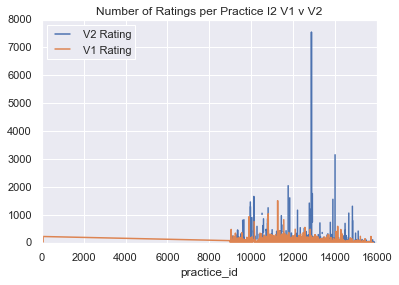

In [437]:
combo2 =pd.concat([ v2count,v1count], axis=1)
combo2.plot(title='Number of Ratings per Practice I2 V1 v V2')
plt.savefig('Number of Ratings per Practice ID V1V2PP.png')

In [421]:
v1avg = pd.pivot_table(v1DF, index= ['practice_id'], values= "rating")
v2avg = pd.pivot_table(v2DF, index= ['practice_id'], values= "rating")


Ttest_indResult(statistic=array([-11.430699]), pvalue=array([9.3264496e-30]))


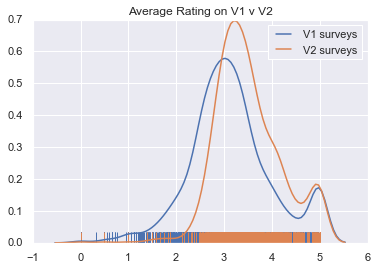

In [428]:
print(stats.ttest_ind(v1avg, v2avg) )

sns.distplot(v1avg, hist=False, label = "V1 surveys", rug=True).set_title("Average Rating on V1 v V2")
sns.distplot(v2avg, hist=False, label = "V2 surveys",rug=True)
plt.savefig('AverageRatingv1v2PP.png')

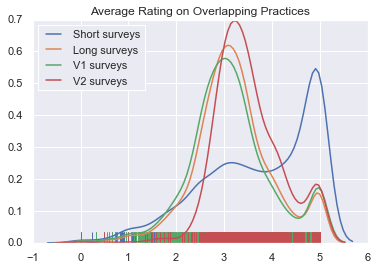

In [689]:
sns.distplot(beforeavg, hist=False, label = "Short surveys", rug=True).set_title("Average Rating on Overlapping Practices")
sns.distplot(afteravg, hist=False, label = "Long surveys",rug=True)
sns.distplot(v1avg, hist=False, label = "V1 surveys", rug=True)
sns.distplot(v2avg, hist=False, label = "V2 surveys",rug=True)
plt.savefig('AverageRatingLSV1V2PP.png')

In [ ]:
#Which “long” survey has a greater impact (v1 or v2)? V2 has significantly higher ratings than v1 as well as significantly more

In [116]:
#2) What kinds of practices do best with “long” survey v1? Would you recommend “long” survey v2 to any specific kinds of practices?

In [475]:
xx = pd.pivot_table(v1DF, index=['specialty'], values=['rating'] )
yy = pd.pivot_table(v2DF, index=['specialty'], values=['rating'] )

Ttest_indResult(statistic=array([-3.86583183]), pvalue=array([0.00018773]))


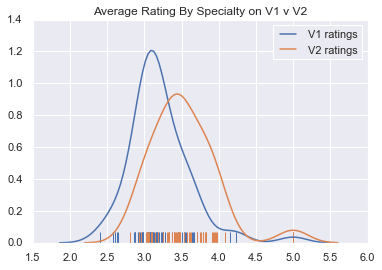

In [482]:
print(stats.ttest_ind(xx, yy))
sns.distplot(xx, hist=False, label = "V1 ratings", rug=True).set_title("Average Rating By Specialty on V1 v V2")
sns.distplot(yy, hist=False, label = "V2 ratings",rug=True)

In [495]:
yy.sort_values(by='rating', ascending=False).head(10)

,rating
specialty,
Nutritionist,5.000000
Oncologist,5.000000
Addiction Medicine Specialist,4.083333
General Practitioner,3.981720
Obstetrician and Gynecologist,3.962085
Acupuncturist,3.947368
Orthodontist,3.942857
Ophthalmologist,3.922390
Dermatologist,3.905737


In [496]:
xx.sort_values(by='rating', ascending=False).head(10)

,rating
specialty,
Physician Assistant,5.000000
Nephrologist,4.235294
Addiction Medicine Specialist,4.153846
Ophthalmologist,3.790497
Geriatrician,3.703390
Neurosurgeon,3.670886
Nurse Practitioner,3.648649
Endodontist,3.639080
Pulmonologist,3.558824


In [497]:
xx2 = pd.pivot_table(v1DF, index=['city'], values=['rating'] )
yy2 = pd.pivot_table(v2DF, index=['city'], values=['rating'] )

In [498]:
yy2.sort_values(by='rating', ascending=False).head(10)

,rating
city,
Palmer,5.0
North Plainfield,5.0
San Rafael,5.0
Ridgewood,5.0
East China Township,5.0
Poplar Bluff,5.0
Pennington,5.0
Ballwin,5.0
Parsippany,5.0


In [499]:
xx2.sort_values(by='rating', ascending=False).head(10)

,rating
city,
Berkeley,5.0
Mountan View,5.0
Durango,5.0
Diamond Bar,5.0
Denver,5.0
Pottsville,5.0
Dawsonville,5.0
"Valencia, CA",5.0
LaBelle,5.0


In [500]:
xx3 = pd.pivot_table(v1DF, index=['state'], values=['rating'] )
yy3 = pd.pivot_table(v2DF, index=['state'], values=['rating'] )
yy3.sort_values(by='rating', ascending=False).head(10)

,rating
state,
IA,4.577869
MS,4.046099
AL,3.979021
TN,3.951698
OH,3.932961
NE,3.929688
LA,3.897082
TX,3.855029
FL,3.808447


In [501]:
xx3.sort_values(by='rating', ascending=False).head(10)

,rating
state,
ME,4.166667
NE,3.953125
NH,3.736842
MO,3.662008
MS,3.453659
NC,3.450278
DE,3.420290
IA,3.400000
ND,3.380952


In [691]:
#3) Do ratings change significantly with either “long” survey? 
print(stats.ttest_ind(beforeavg, v1avg))

print(stats.ttest_ind(beforeavg, v2avg) )

#Yes

#How would you predict which practices will have success,
#defined as at least a 0.3 star increase in their “long” survey average monthly rating vs their “short” survey average 
#monthly rating?

Ttest_indResult(statistic=array([21.88730505]), pvalue=array([2.72457997e-102]))
Ttest_indResult(statistic=array([5.69597448]), pvalue=array([1.30873477e-08]))


In [765]:
success = beforeavg-afteravg
success.head()

,rating
practice_id,
2,2.000000
3,0.238819
5,5.000000
6,0.472430
7,0.901004


In [734]:


success2 = success[(success>=.3)]
success2.head()

,rating
practice_id,
2,2.000000
3,NaN
5,5.000000
6,0.472430
7,0.901004


In [743]:
success2=success2.dropna()
#these are all the practice Ids that improved more than .3 before v after long survey

In [744]:

success2.head()

,rating
practice_id,
2,2.000000
5,5.000000
6,0.472430
7,0.901004
9,2.041667


In [763]:
success4=pd.merge(success2, DF[['city','specialty', 'state','practice_id']], on='practice_id', how='left')
success4.head()

,practice_id,rating,city,specialty,state
0,2,2.0,Santa Monica,Obstetrician and Gynecologist,CA
1,2,2.0,Santa Monica,Obstetrician and Gynecologist,CA
2,2,2.0,Santa Monica,Obstetrician and Gynecologist,CA
3,5,5.0,Malibu,General Dentist,CA
4,5,5.0,Malibu,General Dentist,CA


In [764]:
success4.sort_values(by='rating', ascending=False).head()

,practice_id,rating,city,specialty,state
266029,15005,5.0,Lancaster,Pediatrician,PA
105766,11027,5.0,Austin,Psychologist,TX
266030,15005,5.0,Lancaster,Pediatrician,PA
269204,15379,5.0,Chattanooga,Chiropractor,TN
269205,15379,5.0,Chattanooga,Chiropractor,TN


In [762]:
Scity = pd.pivot_table(success4, index=['city'], values=['rating'] )
Scity.sort_values(by='rating', ascending=False).head(10)

,rating
city,
Lancaster,5.000000
Malibu,5.000000
Cranberry Township,5.000000
Chattanooga,5.000000
La Grange,4.285714
Monrovia,3.888889
Leesburg / Ashburn,3.582353
Elgin,3.500000
Williamston,3.473256


In [759]:
Scity2 = pd.pivot_table(success4, index=['state'], values=['rating'] )
Scity2.sort_values(by='rating', ascending=False).head(10)

,rating
state,
WY,2.750000
KS,2.198191
NE,2.000000
MT,1.873420
KY,1.806054
IA,1.691688
CT,1.676082
SD,1.664478
AR,1.645270


In [761]:
Scity3 = pd.pivot_table(success4, index=['specialty'], values=['rating'] )
Scity3.sort_values(by='rating', ascending=False).head(10)

,rating
specialty,
Occupational Medicine Specialist,2.909091
Radiologist,2.421392
Periodontist,2.272043
Pulmonologist,2.150333
Audiologist,1.989362
Preventive Medicine Specialist,1.942797
Nutritionist,1.923856
Laser Eye Surgeon,1.923077
Rheumatologist,1.840143


In [ ]:
#4) Would you recommend replacing the “short” survey with either (or both) of the “long” surveys for any or all 
#practices? Provide reasons to support your answer. If you do not have enough data to make a recommendation, 
#what additional data would you need?